In [1]:
import pandas as pd
from scipy.spatial.distance import pdist
import numpy as np
import ast
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
meme_df = pd.read_csv("meme_title&extracted_encoded.csv")
meme_df.head()

,meme_id,cluster,created_utc,title,selftext,author,num_comments,score,extracted_text,comments_text,created_date,combined_text,embedding
0,cawlo8,cluster_4,1.562651e+09,"I have an MIDI keyboard, just no plug for it ):",NaN,YTMusicXD,0,3,When you want to easily make midi; limited pow...,NaN,2019-07-09,"i have an midi keyboard, just no plug for it )...","[0.01698530651628971, -0.05091726407408714, 0...."
1,d72m1n,cluster_4,1.569021e+09,R.I.P,NaN,masnargom,0,95,When Imina room full of antivax children and f...,NaN,2019-09-20,"r.i.p, when imina room full of antivax childre...","[-0.010727208107709885, -0.05301818996667862, ..."
2,bo6k2s,cluster_4,1.557769e+09,It's like a life hack,NaN,emanuelegay,2,4,Connect one Power Bank to another one Unlimite...,This is just plug in a power strip to itself\n...,2019-05-13,"it's like a life hack, connect one power bank ...","[0.042594779282808304, -0.020960019901394844, ..."
3,cr40bc,cluster_4,1.565948e+09,I Finally Have Unlimited Power,NaN,Zaxoosh,0,64,When you finally get enough karma to post on r...,NaN,2019-08-16,"i finally have unlimited power, when you final...","[-0.0012538969749584794, 0.06874915212392807, ..."
4,apoel0,cluster_4,1.549939e+09,Crrevt,NaN,memeboiiii7059,0,7,whwn yoy make a meme wirh one hand Unlimited p...,NaN,2019-02-12,"crrevt, whwn yoy make a meme wirh one hand unl...","[0.000849792908411473, -0.06012774631381035, 0..."


In [5]:
cluster_81_df = meme_df[meme_df["cluster"]=="cluster_81"]
len(cluster_81_df)

1191

In [6]:
cluster_81_df['comments_text'].str.contains("remove", case=False, na=False).sum()

548

In [7]:
filtered_df = cluster_81_df[~cluster_81_df['comments_text'].str.contains("remove", case=False, na=False)]

In [8]:
len(filtered_df)

643

In [10]:
filtered_df['embedding'] = filtered_df['embedding'].apply(lambda x: ast.literal_eval(x))

/scratch/local/jobs/26517282/ipykernel_2034187/3137959361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['embedding'] = filtered_df['embedding'].apply(lambda x: ast.literal_eval(x))


In [11]:
embeddings = np.array(filtered_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

Average Pairwise Distance: 0.8075941925195197


In [3]:
%%time
meme_df['embedding'] = meme_df['embedding'].apply(lambda x: ast.literal_eval(x))

CPU times: user 5min 35s, sys: 3.8 s, total: 5min 39s
Wall time: 5min 40s


In [4]:
meme_df["created_date"] = pd.to_datetime(meme_df["created_date"])

In [5]:
for cluster in meme_df["cluster"].unique()[:20]:
    template_df = meme_df[meme_df["cluster"]==cluster]
    print(f"{cluster} template has {len(template_df)} instances")
    
    embeddings = np.array(template_df["embedding"].to_list())
    pairwise_distances = pdist(embeddings, metric='cosine')
    average_pairwise_distance = pairwise_distances.mean()
    print(f"Average Pairwise Distance: {average_pairwise_distance}")

cluster_4 template has 103 instances
Average Pairwise Distance: 0.7451741167559556
cluster_5 template has 933 instances
Average Pairwise Distance: 0.8302140084975013
cluster_9 template has 132 instances
Average Pairwise Distance: 0.7544701108245039
cluster_20 template has 252 instances
Average Pairwise Distance: 0.7970174556717539
cluster_21 template has 251 instances
Average Pairwise Distance: 0.804288563418617
cluster_24 template has 243 instances
Average Pairwise Distance: 0.5972611693932427
cluster_27 template has 303 instances
Average Pairwise Distance: 0.821541513907082
cluster_28 template has 125 instances
Average Pairwise Distance: 0.2948776465247794
cluster_31 template has 722 instances
Average Pairwise Distance: 0.8555634519388309
cluster_33 template has 316 instances
Average Pairwise Distance: 0.8600157866688906
cluster_34 template has 898 instances
Average Pairwise Distance: 0.8246278407889657
cluster_35 template has 348 instances
Average Pairwise Distance: 0.83230498577940

In [10]:
cluster = "cluster_81"
template_df = meme_df[meme_df["cluster"]==cluster]
print(f"{cluster} template has {len(template_df)} instances")

template_df["created_date"] = pd.to_datetime(template_df["created_date"])

# Group by month and calculate content diversity
monthly_diversity = []
months = []

cluster_81 template has 1191 instances


/scratch/local/jobs/26514577/ipykernel_890470/1877646030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  template_df["created_date"] = pd.to_datetime(template_df["created_date"])


In [11]:
for month, group in template_df.groupby(template_df["created_date"].dt.to_period("M")):
    embeddings = np.array(group["embedding"].to_list())
    if len(embeddings) > 1:  # Ensure there are at least two embeddings for pairwise distance
        pairwise_distances = pdist(embeddings, metric='cosine')
        average_pairwise_distance = pairwise_distances.mean()
        monthly_diversity.append(average_pairwise_distance)
    else:
        # Handle cases with only one instance (no pairwise distances)
        monthly_diversity.append(0)
    months.append(month)

In [12]:
# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

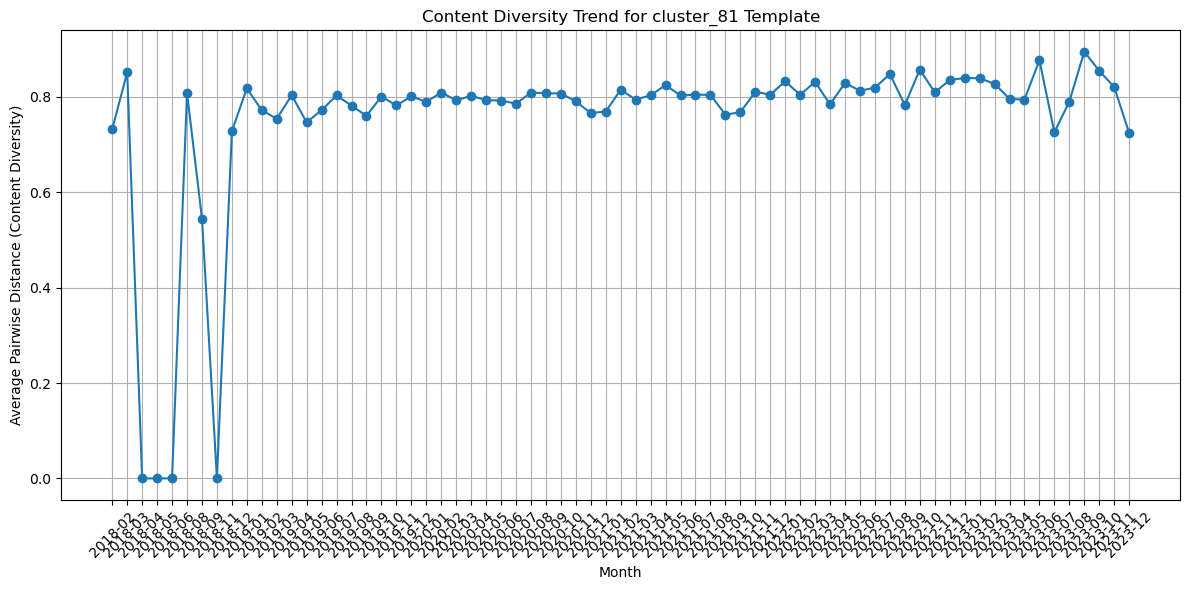

In [13]:
# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Pairwise Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

cluster_81 template has 1191 instances


/scratch/local/jobs/26514577/ipykernel_890470/1696940790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  template_df["created_date"] = pd.to_datetime(template_df["created_date"])


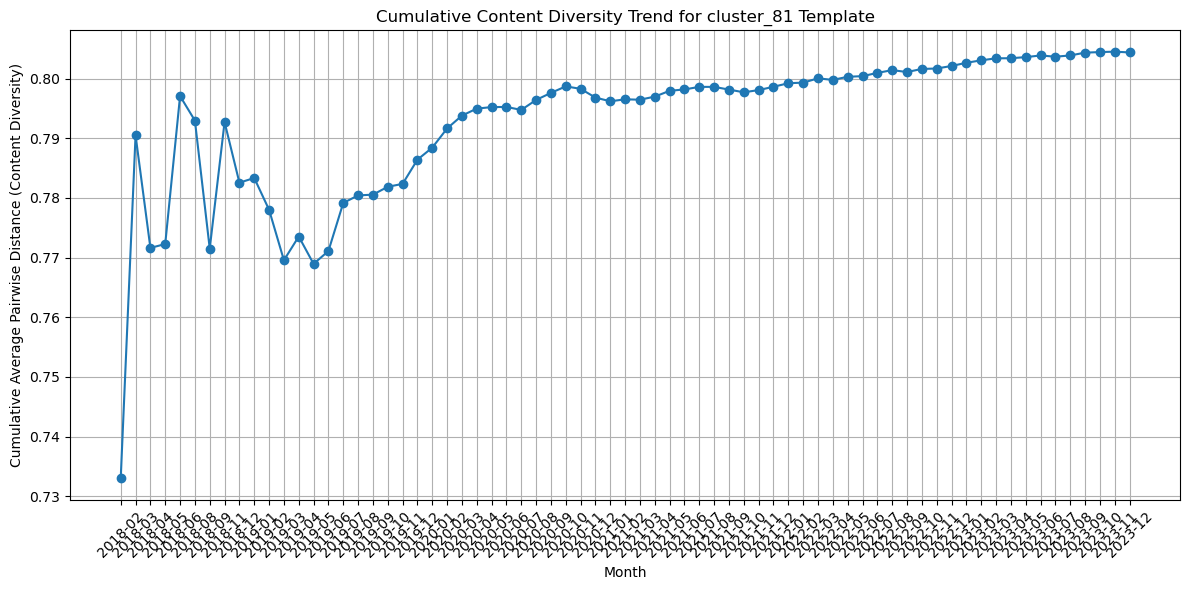

In [14]:
# Filter the DataFrame for the specific cluster
template_df = meme_df[meme_df["cluster"] == cluster]
print(f"{cluster} template has {len(template_df)} instances")

# Convert created_date to datetime if it's not already
template_df["created_date"] = pd.to_datetime(template_df["created_date"])

# Sort by date to ensure proper cumulative calculation
template_df = template_df.sort_values("created_date")

# Initialize variables for cumulative calculation
cumulative_diversity = []
cumulative_embeddings = []  # Store embeddings cumulatively
months = []

# Group by month and calculate cumulative content diversity
for month, group in template_df.groupby(template_df["created_date"].dt.to_period("M")):
    # Add embeddings from the current group to the cumulative list
    current_embeddings = group["embedding"].to_list()
    cumulative_embeddings.extend(current_embeddings)
    
    # Calculate pairwise distances for the cumulative embeddings
    embeddings_array = np.array(cumulative_embeddings)
    if len(embeddings_array) > 1:  # Ensure there are at least two embeddings for pairwise distance
        pairwise_distances = pdist(embeddings_array, metric='cosine')
        average_pairwise_distance = pairwise_distances.mean()
        cumulative_diversity.append(average_pairwise_distance)
    else:
        cumulative_diversity.append(0)  # Handle cases with only one embedding
    
    months.append(month)

# Convert results to a DataFrame for visualization
cumulative_trend_df = pd.DataFrame({
    "Month": months,
    "Cumulative Content Diversity": cumulative_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(cumulative_trend_df["Month"].astype(str), cumulative_trend_df["Cumulative Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Cumulative Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Cumulative Average Pairwise Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

cluster_175 template has 2184 instances


/scratch/local/jobs/26514577/ipykernel_890470/286493479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  template_df["created_date"] = pd.to_datetime(template_df["created_date"])


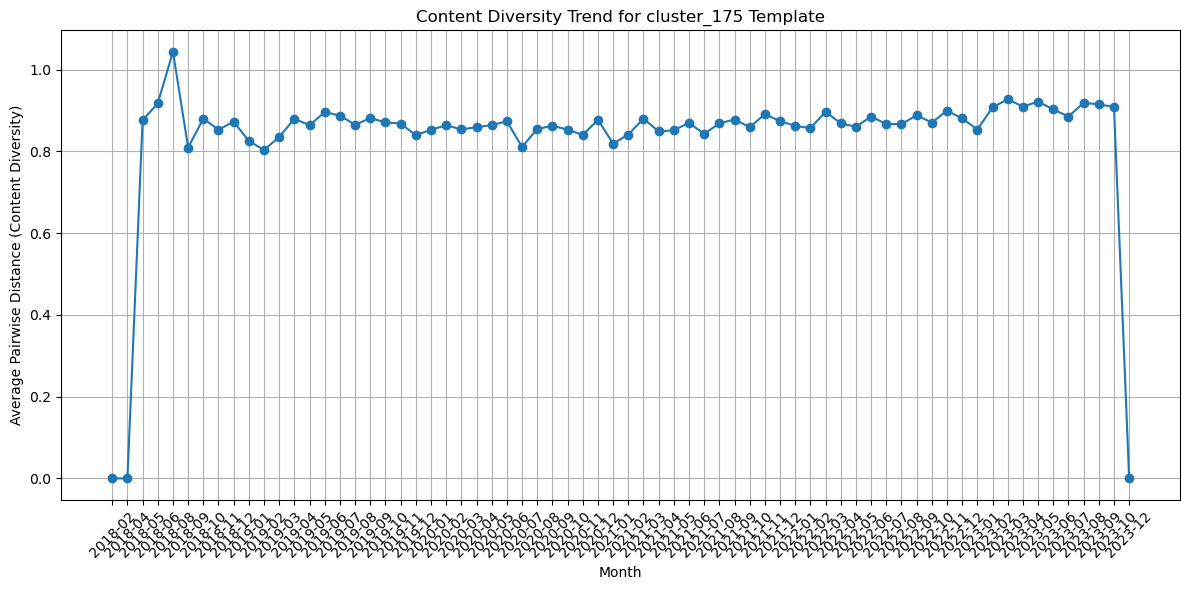

In [15]:
cluster = "cluster_175"
template_df = meme_df[meme_df["cluster"]==cluster]
print(f"{cluster} template has {len(template_df)} instances")

template_df["created_date"] = pd.to_datetime(template_df["created_date"])

# Group by month and calculate content diversity
monthly_diversity = []
months = []

for month, group in template_df.groupby(template_df["created_date"].dt.to_period("M")):
    embeddings = np.array(group["embedding"].to_list())
    if len(embeddings) > 1:  # Ensure there are at least two embeddings for pairwise distance
        pairwise_distances = pdist(embeddings, metric='cosine')
        average_pairwise_distance = pairwise_distances.mean()
        monthly_diversity.append(average_pairwise_distance)
    else:
        # Handle cases with only one instance (no pairwise distances)
        monthly_diversity.append(0)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Pairwise Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

cluster_175 template has 2184 instances


/scratch/local/jobs/26514577/ipykernel_890470/1696940790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  template_df["created_date"] = pd.to_datetime(template_df["created_date"])


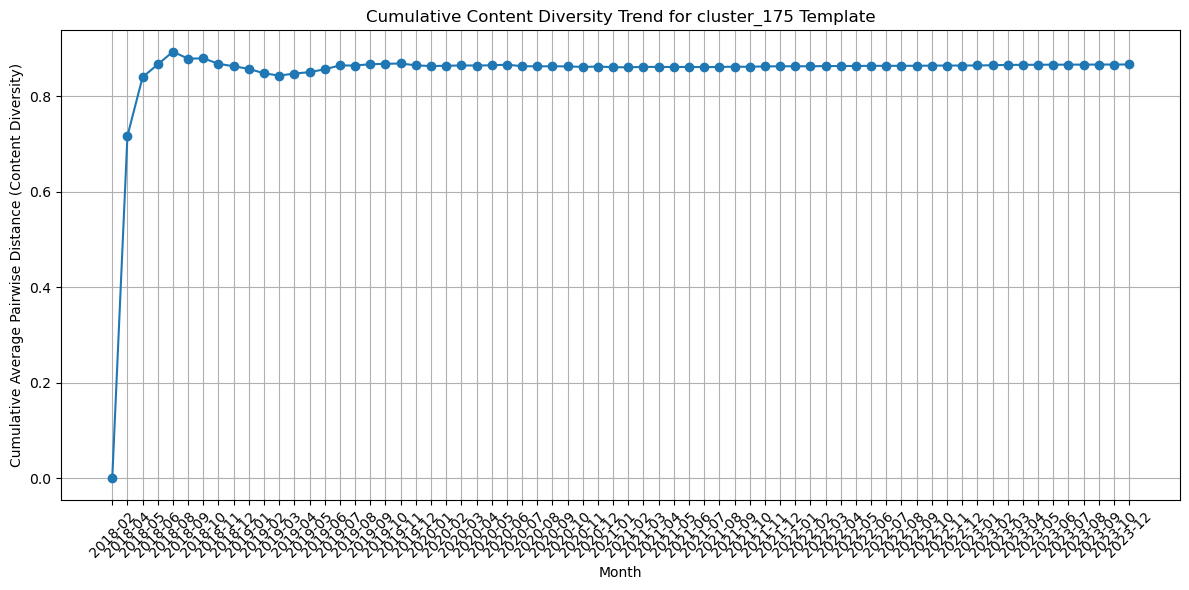

In [16]:
# Filter the DataFrame for the specific cluster
template_df = meme_df[meme_df["cluster"] == cluster]
print(f"{cluster} template has {len(template_df)} instances")

# Convert created_date to datetime if it's not already
template_df["created_date"] = pd.to_datetime(template_df["created_date"])

# Sort by date to ensure proper cumulative calculation
template_df = template_df.sort_values("created_date")

# Initialize variables for cumulative calculation
cumulative_diversity = []
cumulative_embeddings = []  # Store embeddings cumulatively
months = []

# Group by month and calculate cumulative content diversity
for month, group in template_df.groupby(template_df["created_date"].dt.to_period("M")):
    # Add embeddings from the current group to the cumulative list
    current_embeddings = group["embedding"].to_list()
    cumulative_embeddings.extend(current_embeddings)
    
    # Calculate pairwise distances for the cumulative embeddings
    embeddings_array = np.array(cumulative_embeddings)
    if len(embeddings_array) > 1:  # Ensure there are at least two embeddings for pairwise distance
        pairwise_distances = pdist(embeddings_array, metric='cosine')
        average_pairwise_distance = pairwise_distances.mean()
        cumulative_diversity.append(average_pairwise_distance)
    else:
        cumulative_diversity.append(0)  # Handle cases with only one embedding
    
    months.append(month)

# Convert results to a DataFrame for visualization
cumulative_trend_df = pd.DataFrame({
    "Month": months,
    "Cumulative Content Diversity": cumulative_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(cumulative_trend_df["Month"].astype(str), cumulative_trend_df["Cumulative Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Cumulative Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Cumulative Average Pairwise Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

cluster_175 template has 2184 instances


/scratch/local/jobs/26514577/ipykernel_890470/2430274082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  template_df["created_date"] = pd.to_datetime(template_df["created_date"])


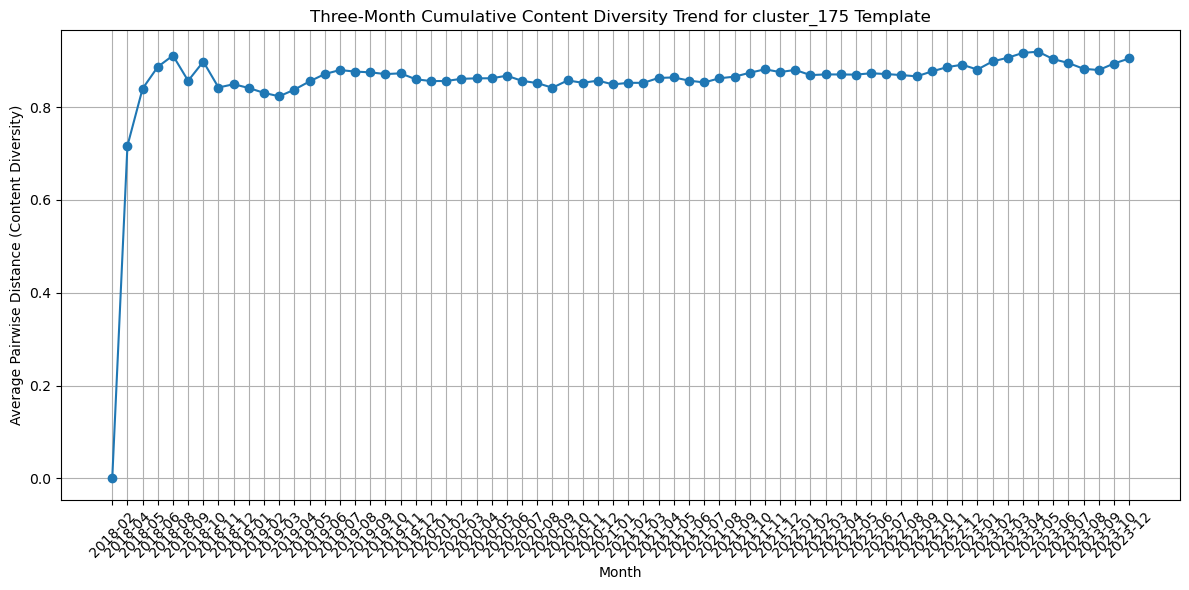

In [52]:

# Filter the DataFrame for the specific cluster
cluster = "cluster_175"
template_df = meme_df[meme_df["cluster"] == cluster]
print(f"{cluster} template has {len(template_df)} instances")

# Convert created_date to datetime if it's not already
template_df["created_date"] = pd.to_datetime(template_df["created_date"])

# Sort by date to ensure proper cumulative calculation
template_df = template_df.sort_values("created_date")

# Create a period column for grouping by month
template_df["Month"] = template_df["created_date"].dt.to_period("M")

# Initialize variables
three_month_diversity = []
months = []

# Get unique months in order
unique_months = sorted(template_df["Month"].unique())

# Calculate three-month cumulative diversity
for i, current_month in enumerate(unique_months):
    # Get the last three months (current and two previous)
    three_month_window = unique_months[max(0, i - 2):i + 1]
    
    # Filter the DataFrame for these months
    window_data = template_df[template_df["Month"].isin(three_month_window)]
    
    # Get embeddings for the three-month window
    embeddings = np.array(window_data["embedding"].to_list())
    
    if len(embeddings) > 1:  # Ensure there are at least two embeddings for pairwise distance
        pairwise_distances = pdist(embeddings, metric='cosine')
        average_pairwise_distance = pairwise_distances.mean()
        three_month_diversity.append(average_pairwise_distance)
    else:
        three_month_diversity.append(0)  # Handle cases with only one embedding
    
    months.append(current_month)

# Convert results to a DataFrame for visualization
three_month_trend_df = pd.DataFrame({
    "Month": months,
    "Three-Month Content Diversity": three_month_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(three_month_trend_df["Month"].astype(str), three_month_trend_df["Three-Month Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Three-Month Cumulative Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Pairwise Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

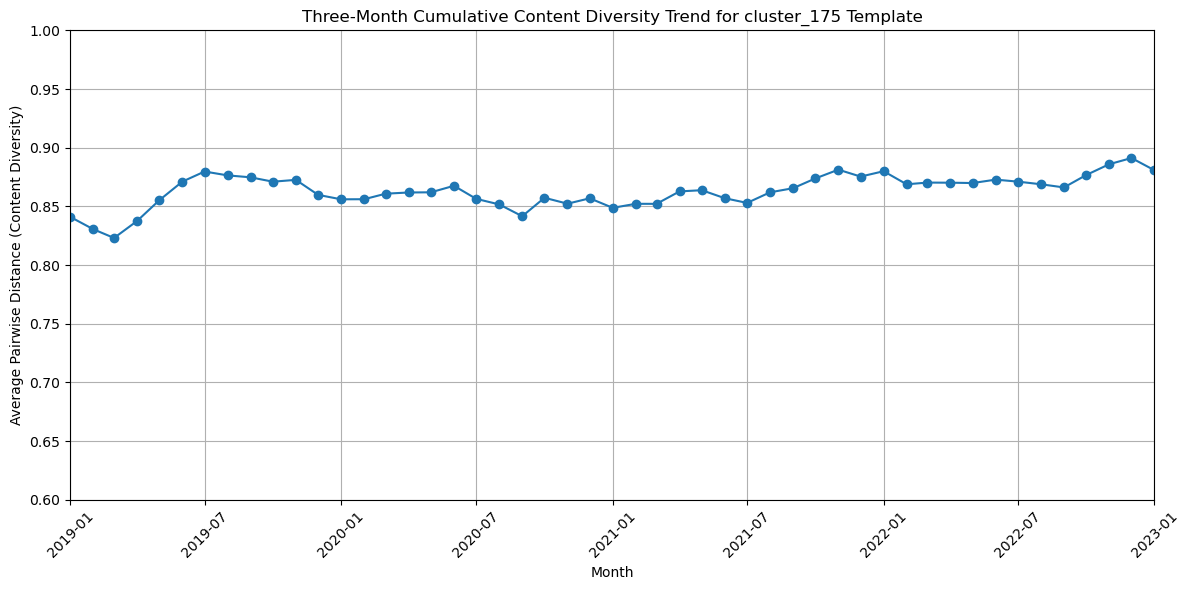

In [54]:
# Convert results to a DataFrame for visualization
three_month_trend_df = pd.DataFrame({
    "Month": months,
    "Three-Month Content Diversity": three_month_diversity
})

# Convert Month to datetime for proper plotting and limit setting
three_month_trend_df["Month"] = pd.to_datetime(three_month_trend_df["Month"].astype(str), format="%Y-%m")

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(three_month_trend_df["Month"], three_month_trend_df["Three-Month Content Diversity"], marker='o')

# Set x-axis limits
plt.xlim(pd.Timestamp("2019-01-01"), pd.Timestamp("2023-01-01"))
plt.ylim(0.6,1)

# Improve plot aesthetics
plt.xticks(rotation=45)
plt.title(f"Three-Month Cumulative Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Pairwise Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

cluster_81 template has 1191 instances


/scratch/local/jobs/26515042/ipykernel_4087938/1380187912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  template_df["created_date"] = pd.to_datetime(template_df["created_date"])


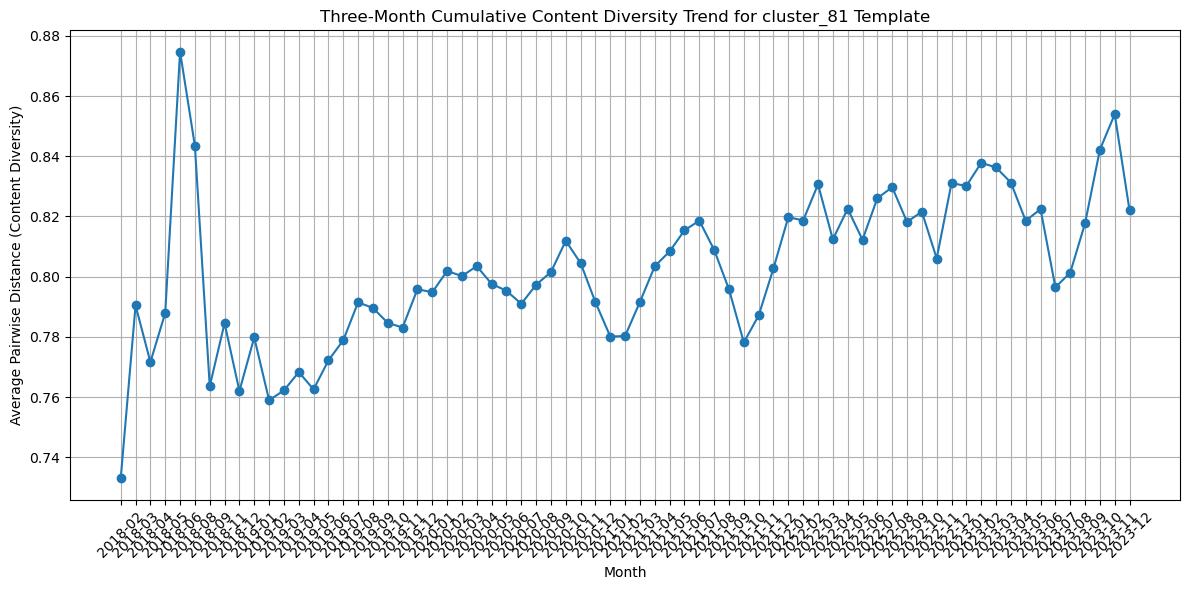

In [6]:
# Filter the DataFrame for the specific cluster
cluster = "cluster_81"
template_df = meme_df[meme_df["cluster"] == cluster]
print(f"{cluster} template has {len(template_df)} instances")

# Convert created_date to datetime if it's not already
template_df["created_date"] = pd.to_datetime(template_df["created_date"])

# Sort by date to ensure proper cumulative calculation
template_df = template_df.sort_values("created_date")

# Create a period column for grouping by month
template_df["Month"] = template_df["created_date"].dt.to_period("M")

# Initialize variables
three_month_diversity = []
months = []

# Get unique months in order
unique_months = sorted(template_df["Month"].unique())

# Calculate three-month cumulative diversity
for i, current_month in enumerate(unique_months):
    # Get the last three months (current and two previous)
    three_month_window = unique_months[max(0, i - 2):i + 1]
    
    # Filter the DataFrame for these months
    window_data = template_df[template_df["Month"].isin(three_month_window)]
    
    # Get embeddings for the three-month window
    embeddings = np.array(window_data["embedding"].to_list())
    
    if len(embeddings) > 1:  # Ensure there are at least two embeddings for pairwise distance
        pairwise_distances = pdist(embeddings, metric='cosine')
        average_pairwise_distance = pairwise_distances.mean()
        three_month_diversity.append(average_pairwise_distance)
    else:
        three_month_diversity.append(0)  # Handle cases with only one embedding
    
    months.append(current_month)

# Convert results to a DataFrame for visualization
three_month_trend_df = pd.DataFrame({
    "Month": months,
    "Three-Month Content Diversity": three_month_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(three_month_trend_df["Month"].astype(str), three_month_trend_df["Three-Month Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Three-Month Cumulative Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Pairwise Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

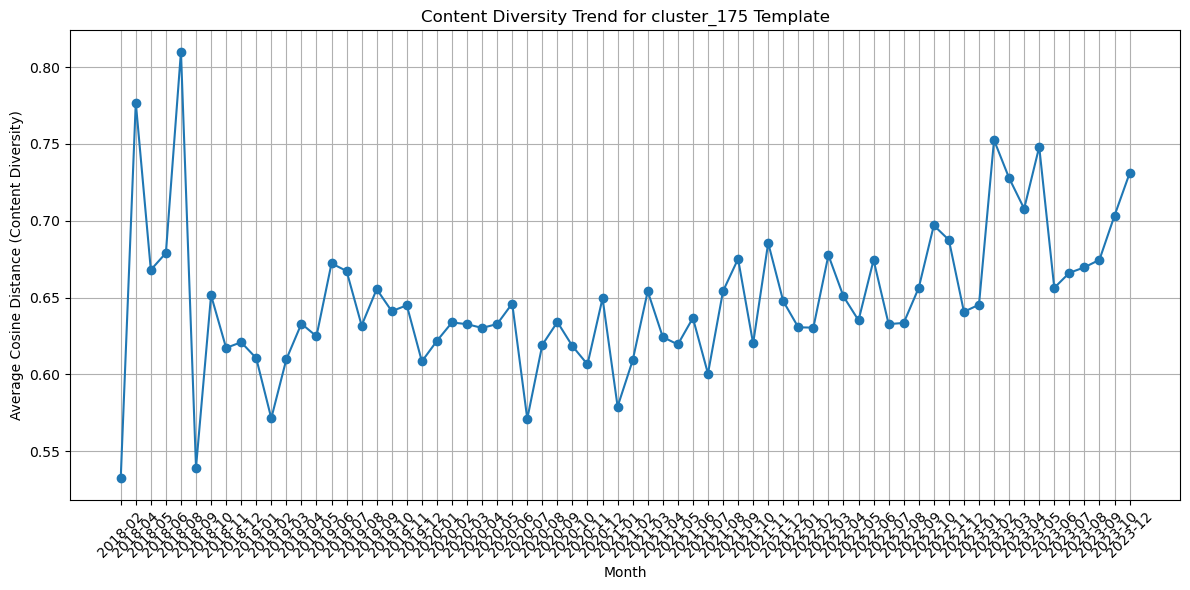

In [7]:
cluster = "cluster_175"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
historical_embeddings = np.array(template_df["embedding"].to_list())
template_embedding = np.mean(historical_embeddings, axis=0)

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

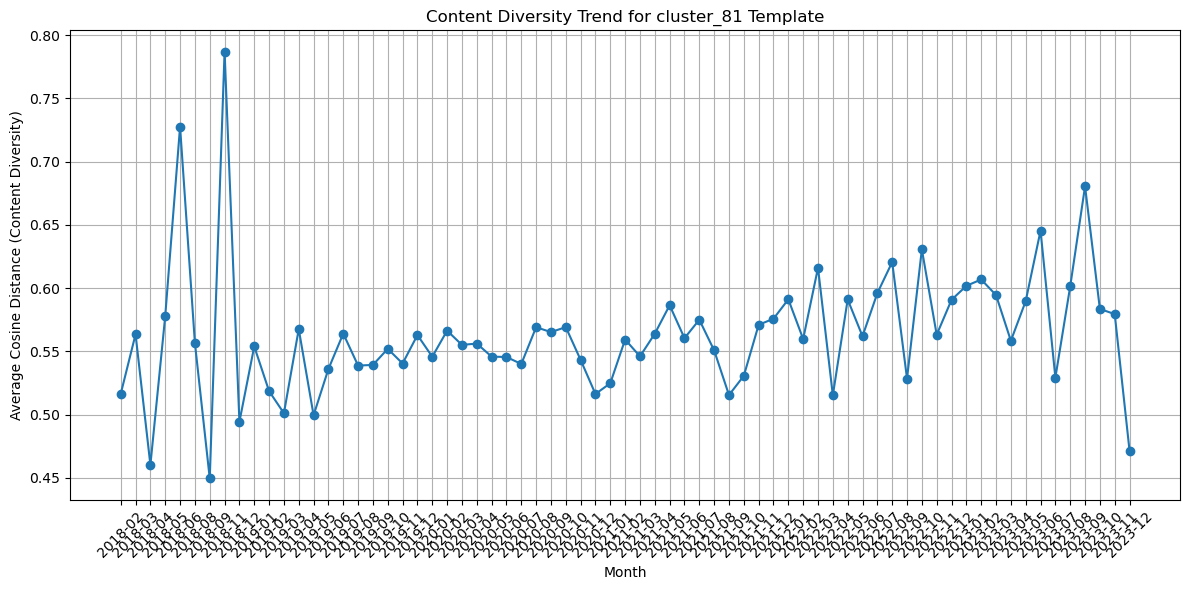

In [8]:
cluster = "cluster_81"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
historical_embeddings = np.array(template_df["embedding"].to_list())
template_embedding = np.mean(historical_embeddings, axis=0)

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

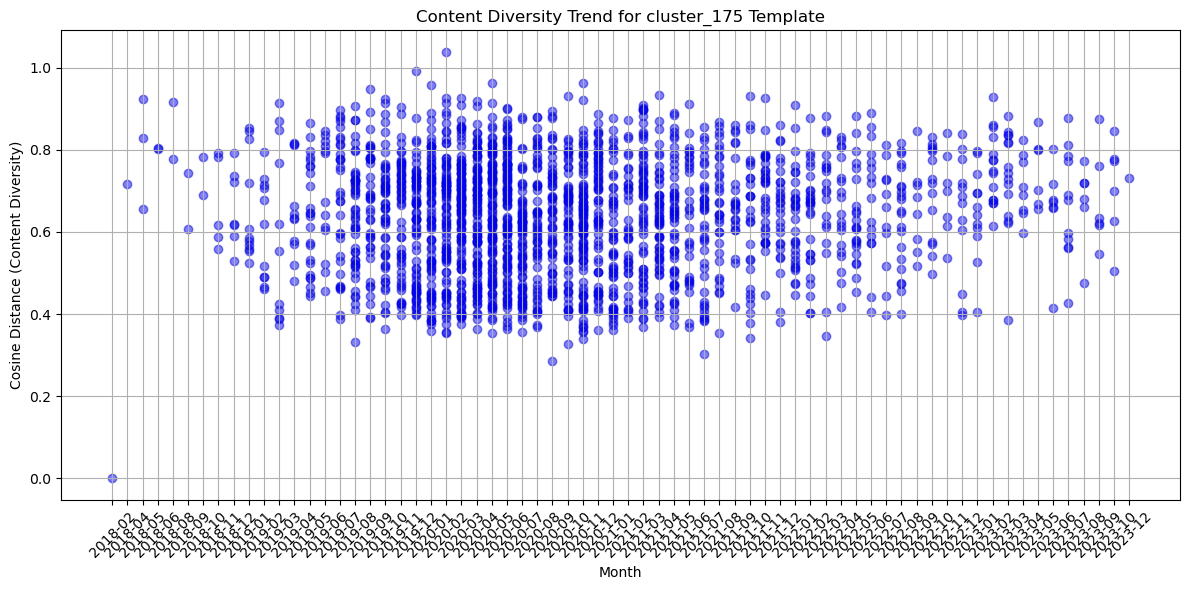

In [56]:
cluster = "cluster_175"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

# Initialize lists to store diversity values and their corresponding months
diversity_values = []
months = []

# Initialize the template embedding
template_embedding = None  

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for each embedding in the current month
    if template_embedding is not None:
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            diversity_values.append(distance)
            months.append(month)
    else:
        # If no historical embeddings, assign zero diversity
        for _ in group["embedding"]:
            diversity_values.append(0)
            months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": diversity_values
})

# Plot the trend using points
plt.figure(figsize=(12, 6))
plt.scatter(
    diversity_trend_df["Month"].astype(str), 
    diversity_trend_df["Content Diversity"], 
    marker='o', 
    color='blue', 
    alpha=0.5  # Set transparency (0 is fully transparent, 1 is fully opaque)
)

# Adjust x-axis ticks for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Cosine Distance (Content Diversity)")

# Add a grid for better visualization
plt.grid()

# Ensure layout fits nicely
plt.tight_layout()

# Display the plot
plt.show()

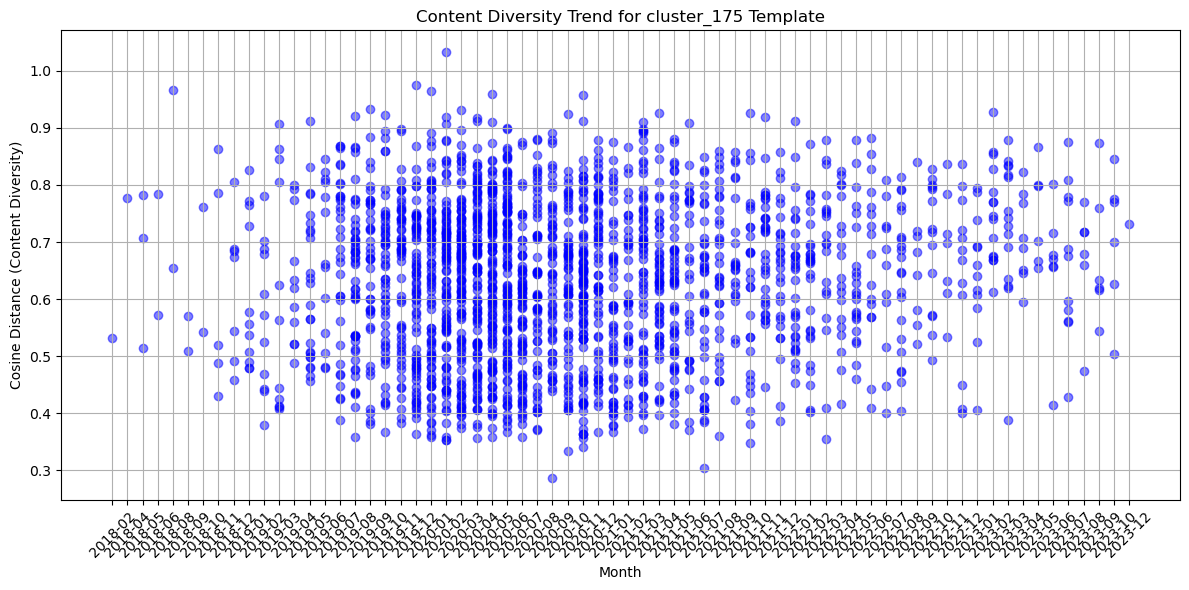

In [9]:
cluster = "cluster_175"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

# Initialize lists to store diversity values and their corresponding months
diversity_values = []
months = []

# Initialize the template embedding
historical_embeddings = np.array(template_df["embedding"].to_list())
template_embedding = np.mean(historical_embeddings, axis=0)

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings
    
    # Compute diversity for each embedding in the current month
    if template_embedding is not None:
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            diversity_values.append(distance)
            months.append(month)
    else:
        # If no historical embeddings, assign zero diversity
        for _ in group["embedding"]:
            diversity_values.append(0)
            months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": diversity_values
})

# Plot the trend using points
plt.figure(figsize=(12, 6))
plt.scatter(
    diversity_trend_df["Month"].astype(str), 
    diversity_trend_df["Content Diversity"], 
    marker='o', 
    color='blue', 
    alpha=0.5  # Set transparency (0 is fully transparent, 1 is fully opaque)
)

# Adjust x-axis ticks for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Cosine Distance (Content Diversity)")

# Add a grid for better visualization
plt.grid()

# Ensure layout fits nicely
plt.tight_layout()

# Display the plot
plt.show()

/home/yingrong/.local/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/yingrong/.local/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


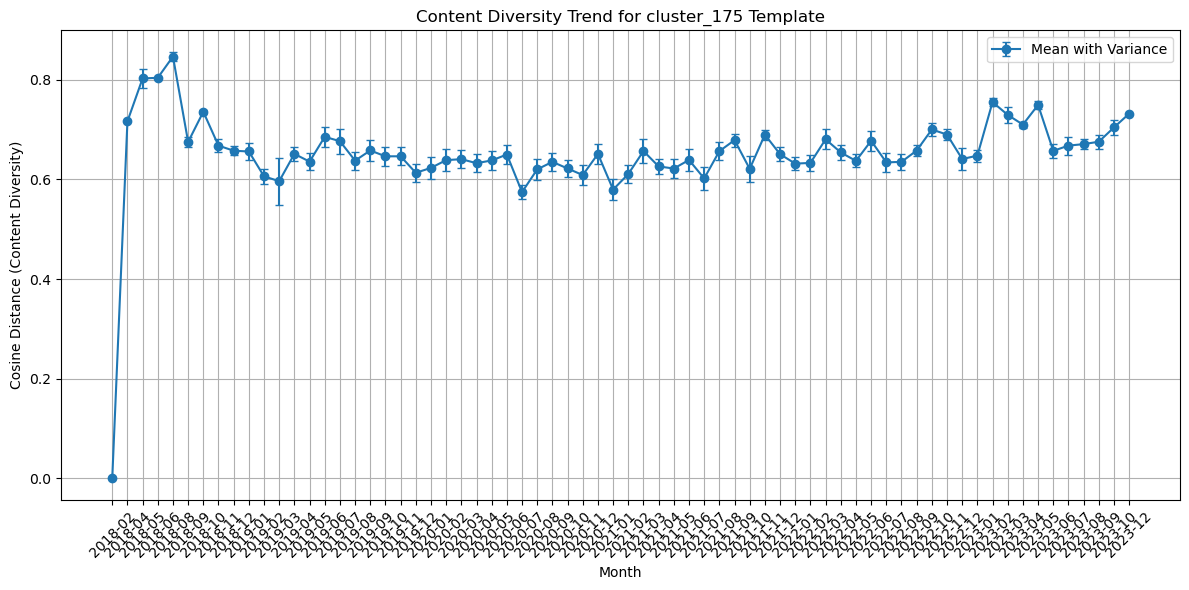

In [59]:
# Calculate mean and variance for each month
mean_values = diversity_trend_df.groupby("Month")["Content Diversity"].mean()
variance_values = diversity_trend_df.groupby("Month")["Content Diversity"].var()

# Convert to DataFrame for easier plotting
summary_df = pd.DataFrame({
    "Mean": mean_values,
    "Variance": variance_values
}).reset_index()

# Plot the scatter plot for individual points with transparency
plt.figure(figsize=(12, 6))


# Plot the mean line with error bars (variance)
plt.errorbar(
    summary_df["Month"].astype(str), 
    summary_df["Mean"], 
    yerr=summary_df["Variance"], 
    fmt='-o', 
    capsize=3,  # Adds caps to error bars
    label='Mean with Variance'
)

# Adjust x-axis ticks for better readability
plt.xticks(rotation=45)

# Add labels, title, and legend
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Cosine Distance (Content Diversity)")
plt.legend()

# Add a grid for better visualization
plt.grid()

# Ensure layout fits nicely
plt.tight_layout()

# Display the plot
plt.show()

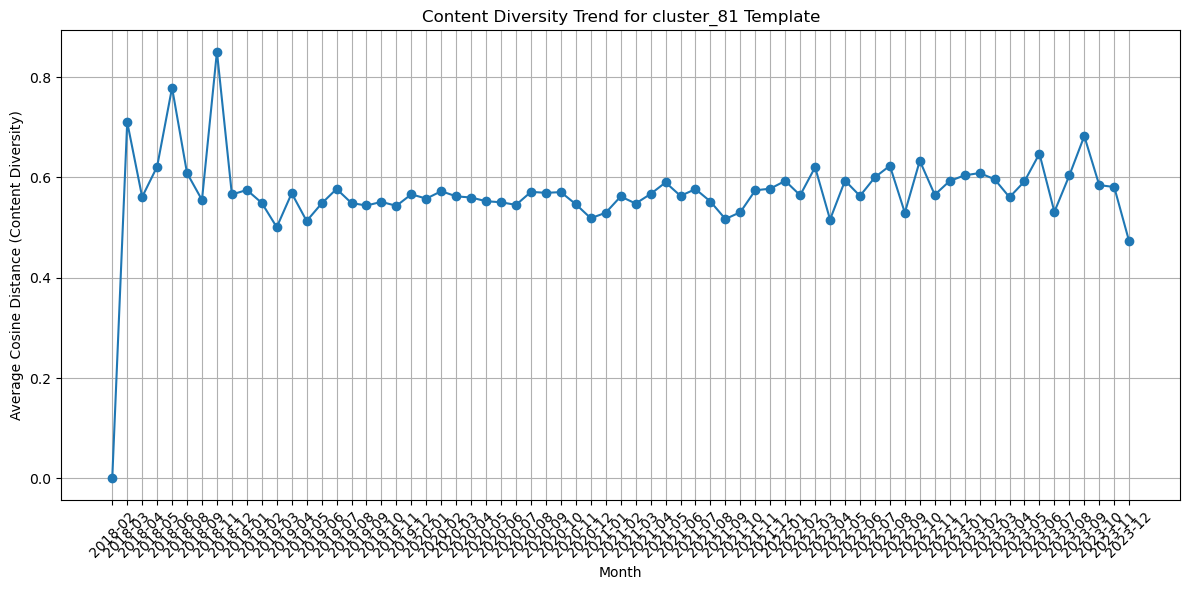

In [20]:
cluster = "cluster_81"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

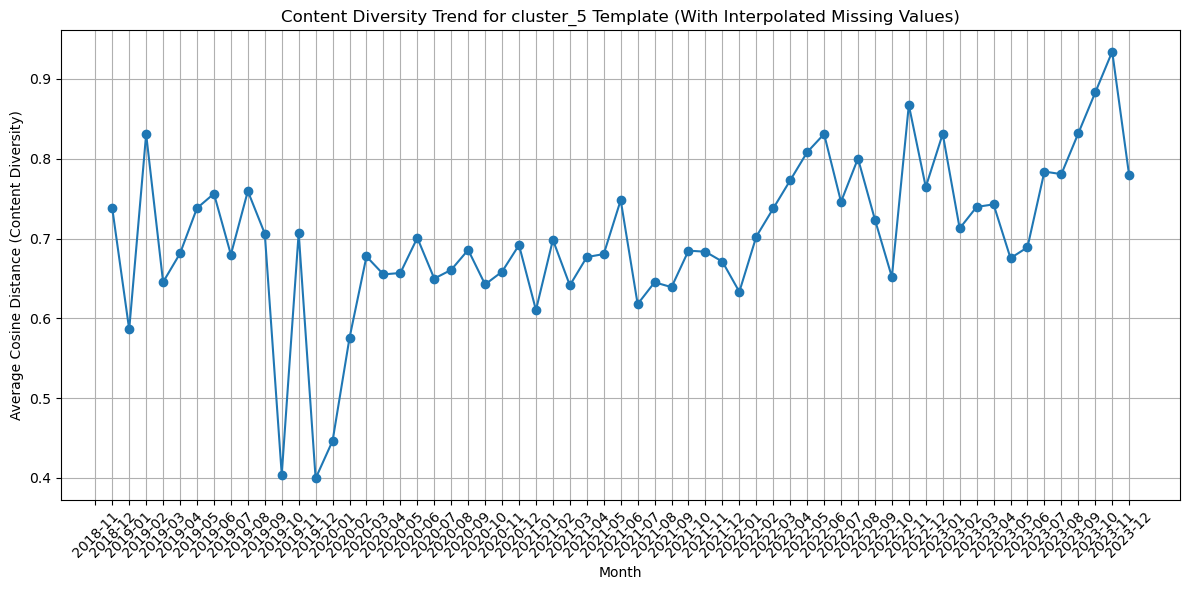

In [21]:
 import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

# Filter and prepare the data
cluster = "cluster_5"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

# Create a complete list of all months in the range of the dataset
all_months = pd.period_range(start=template_df["Month"].min(), end=template_df["Month"].max(), freq="M")

# Initialize variables
monthly_diversity = []
template_embedding = None  # Initialize the template embedding

# Iterate over all months
for month in all_months:
    # Filter the current and historical data
    historical_data = template_df[template_df["Month"] < month]
    group = template_df[template_df["Month"] == month]
    
    # Update the template embedding (average of historical embeddings)
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        if len(group) == 0:
            average_distance = None  # Mark missing values as None
        else:
            for embedding in group["embedding"]:
                distance = cosine(template_embedding, embedding)
                distances.append(distance)
            average_distance = np.mean(distances)
    else:
        average_distance = None  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)

# Create a DataFrame
diversity_trend_df = pd.DataFrame({
    "Month": all_months,
    "Content Diversity": monthly_diversity
})

# Interpolate missing values using the average of left and right points
diversity_trend_df["Content Diversity"] = diversity_trend_df["Content Diversity"].interpolate(method='linear')

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template (With Interpolated Missing Values)")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

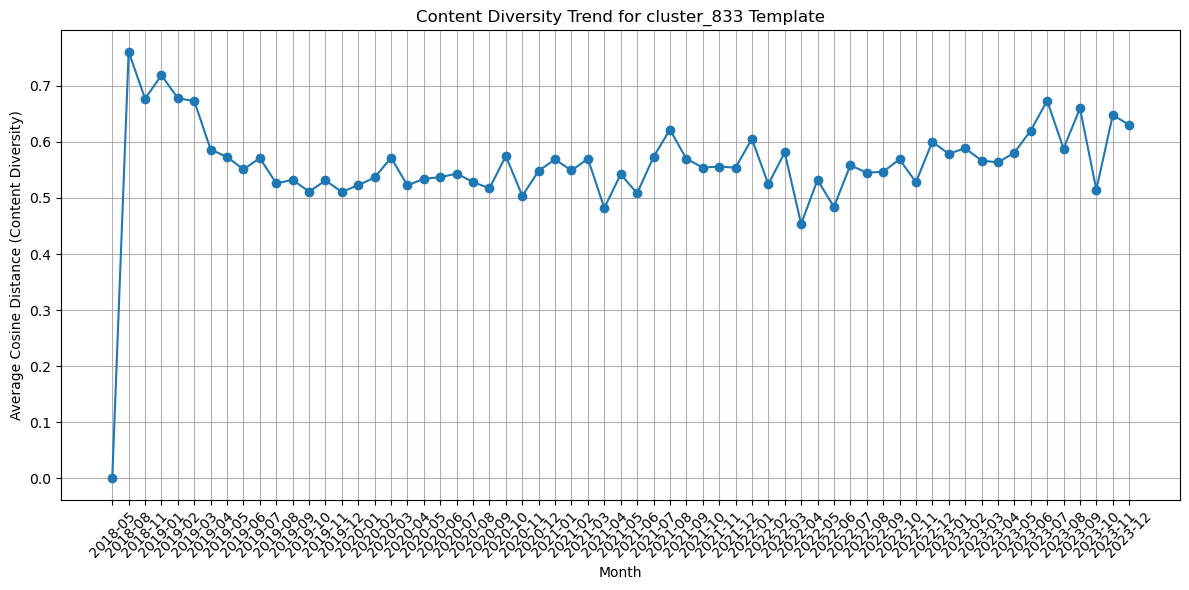

In [22]:
cluster = "cluster_833"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

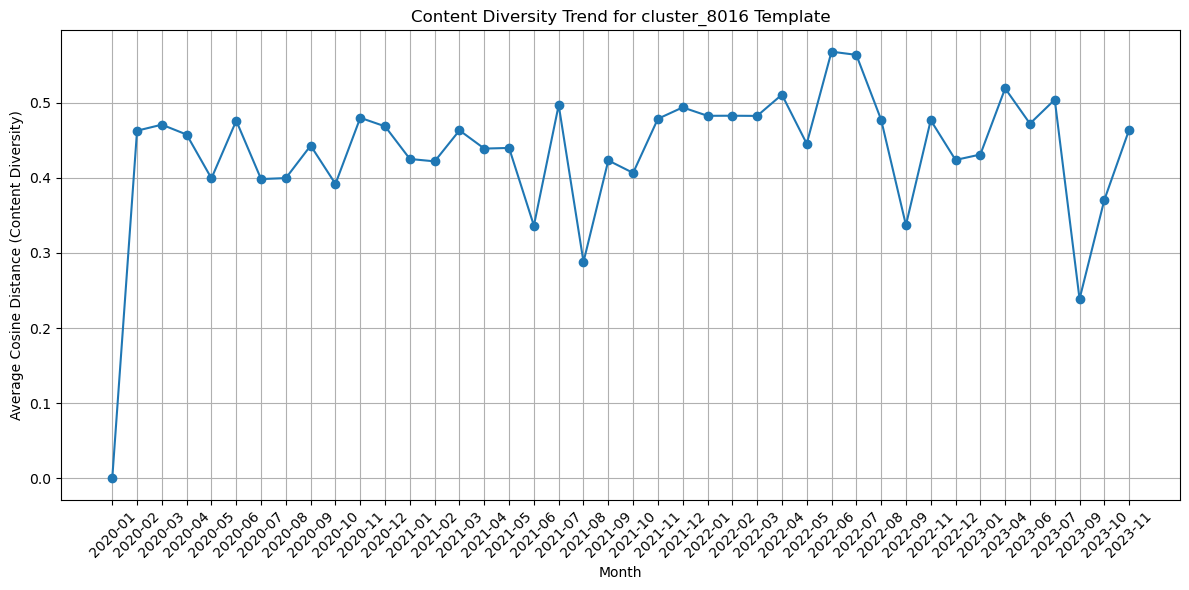

In [23]:
cluster = "cluster_8016"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

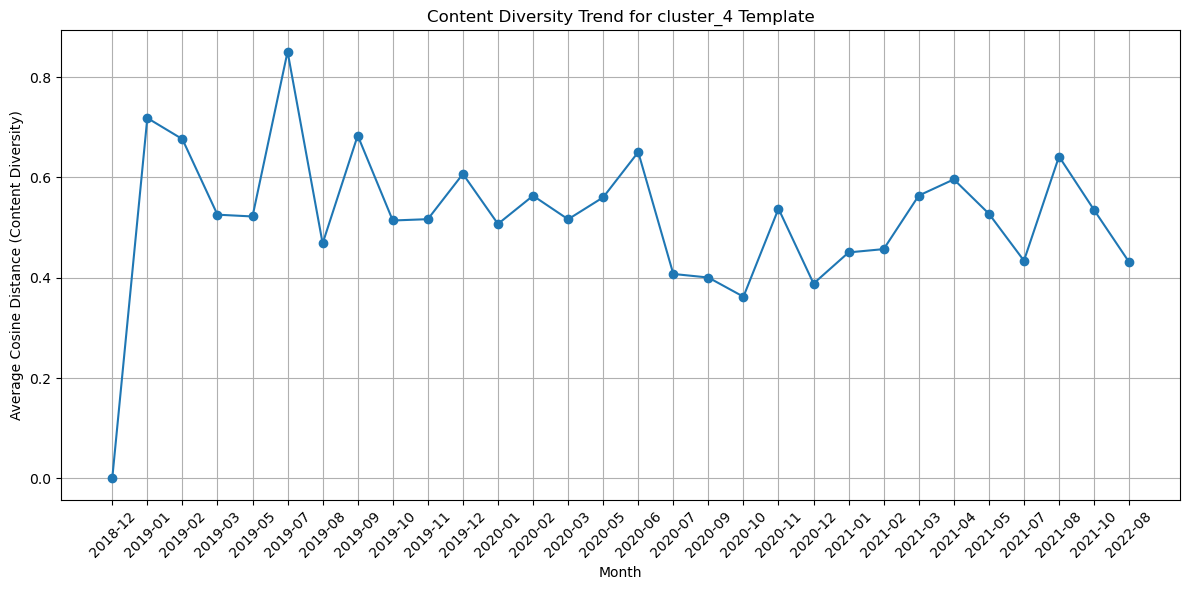

In [24]:
cluster = "cluster_4"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

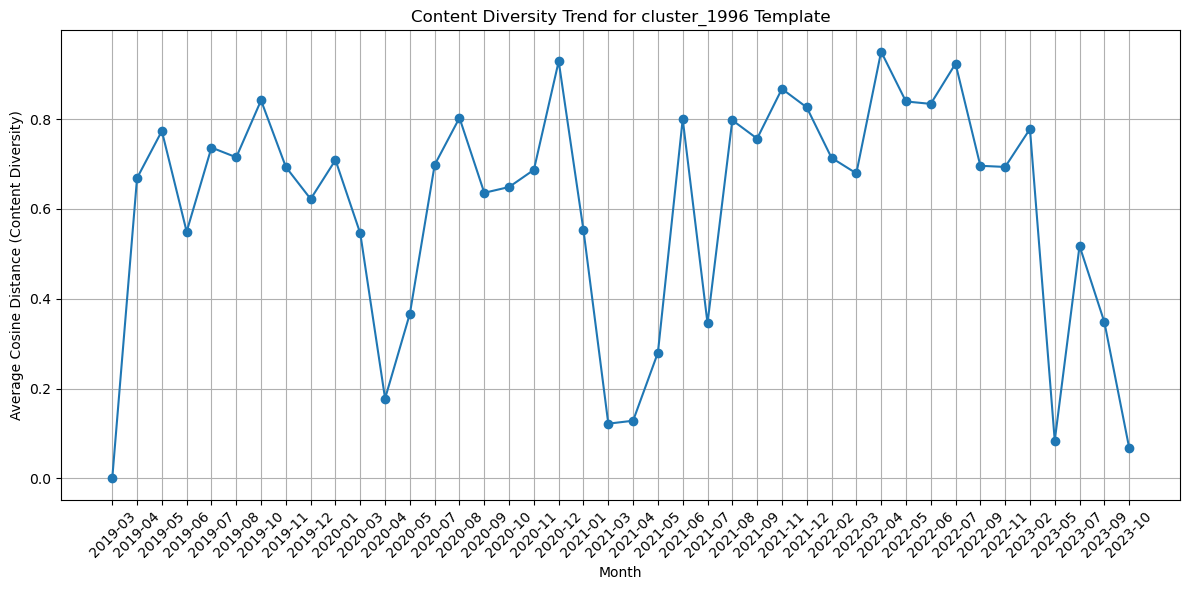

In [25]:
cluster = "cluster_1996"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        if len(group) == 0:
            average_distance = 0
        else: 
            for embedding in group["embedding"]:
                distance = cosine(template_embedding, embedding)
                distances.append(distance)
            average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

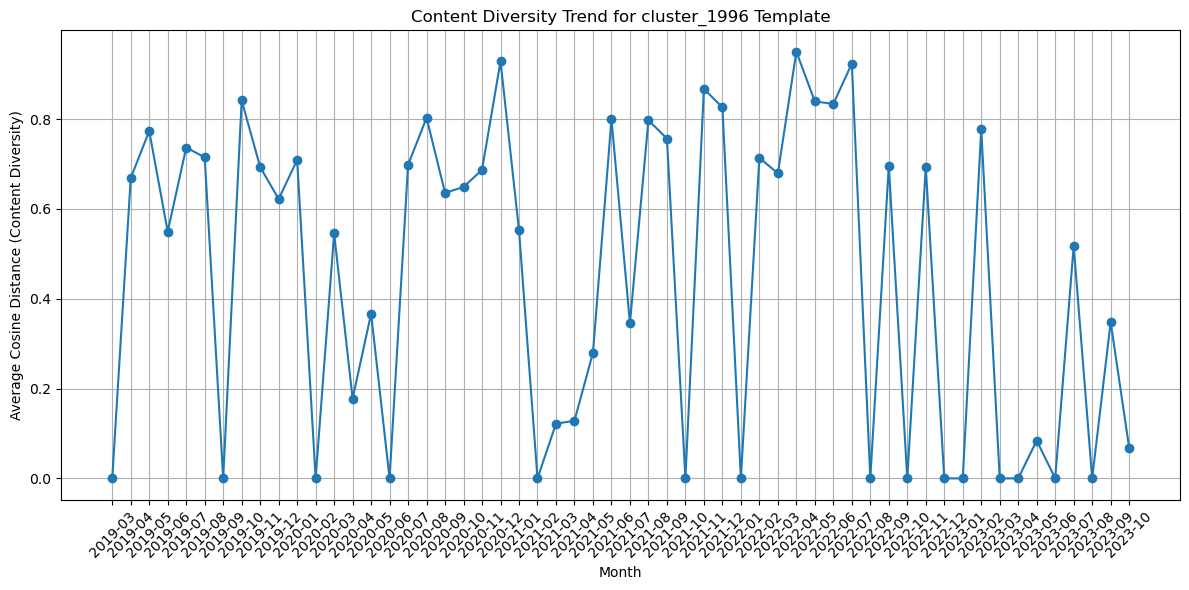

In [26]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

# Filter and prepare the data
cluster = "cluster_1996"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

# Create a complete list of all months in the range of the dataset
all_months = pd.period_range(start=template_df["Month"].min(), end=template_df["Month"].max(), freq="M")

# Initialize variables
monthly_diversity = []
template_embedding = None  # Initialize the template embedding

# Iterate over all months
for month in all_months:
    # Filter the current and historical data
    historical_data = template_df[template_df["Month"] < month]
    group = template_df[template_df["Month"] == month]
    
    # Update the template embedding (average of historical embeddings)
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        if len(group) == 0:
            average_distance = 0
        else:
            for embedding in group["embedding"]:
                distance = cosine(template_embedding, embedding)
                distances.append(distance)
            average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": all_months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

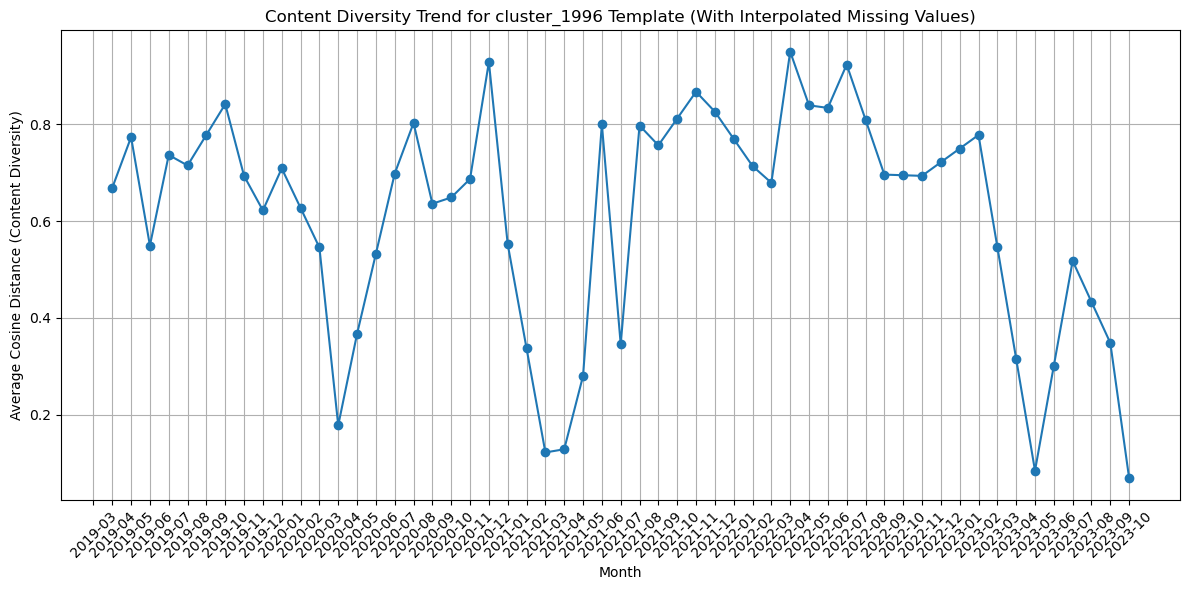

In [27]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

# Filter and prepare the data
cluster = "cluster_1996"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

# Create a complete list of all months in the range of the dataset
all_months = pd.period_range(start=template_df["Month"].min(), end=template_df["Month"].max(), freq="M")

# Initialize variables
monthly_diversity = []
template_embedding = None  # Initialize the template embedding

# Iterate over all months
for month in all_months:
    # Filter the current and historical data
    historical_data = template_df[template_df["Month"] < month]
    group = template_df[template_df["Month"] == month]
    
    # Update the template embedding (average of historical embeddings)
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        if len(group) == 0:
            average_distance = None  # Mark missing values as None
        else:
            for embedding in group["embedding"]:
                distance = cosine(template_embedding, embedding)
                distances.append(distance)
            average_distance = np.mean(distances)
    else:
        average_distance = None  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)

# Create a DataFrame
diversity_trend_df = pd.DataFrame({
    "Month": all_months,
    "Content Diversity": monthly_diversity
})

# Interpolate missing values using the average of left and right points
diversity_trend_df["Content Diversity"] = diversity_trend_df["Content Diversity"].interpolate(method='linear')

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template (With Interpolated Missing Values)")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

In [28]:
template_df = meme_df[meme_df["cluster"]=="cluster_1996"]
print(f"{cluster} template has {len(template_df)} instances")

embeddings = np.array(template_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

cluster_1996 template has 295 instances
Average Pairwise Distance: 0.59542222583652


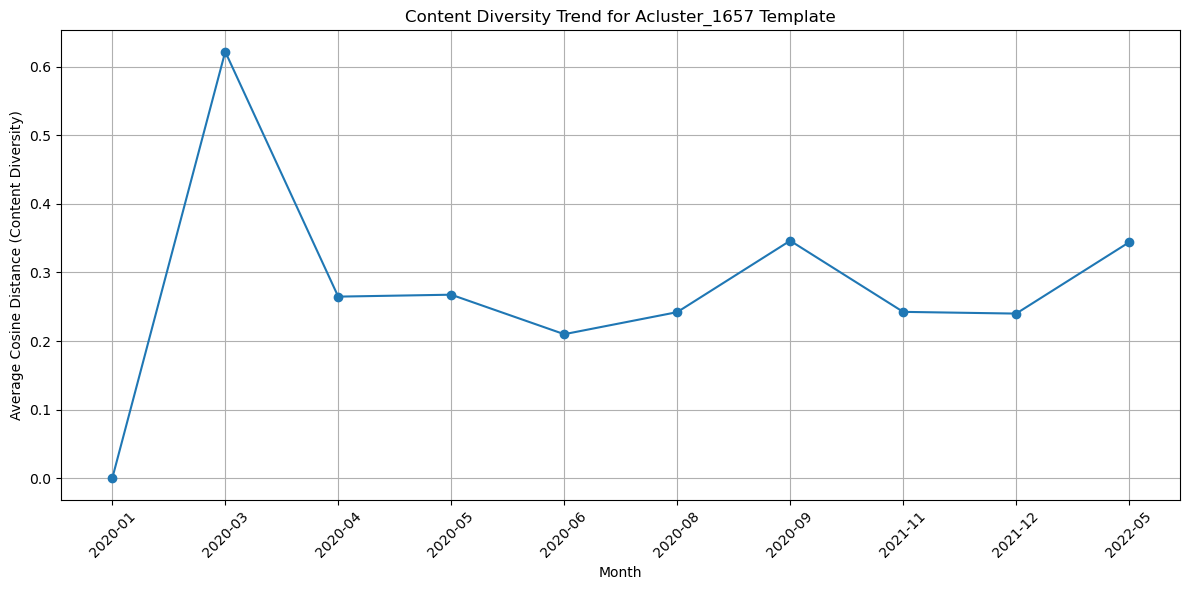

In [29]:
cluster = "Acluster_1657"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

In [30]:
template_df = meme_df[meme_df["cluster"]=="Acluster_1657"]
print(f"{cluster} template has {len(template_df)} instances")

embeddings = np.array(template_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

Acluster_1657 template has 273 instances
Average Pairwise Distance: 0.46442832816025226


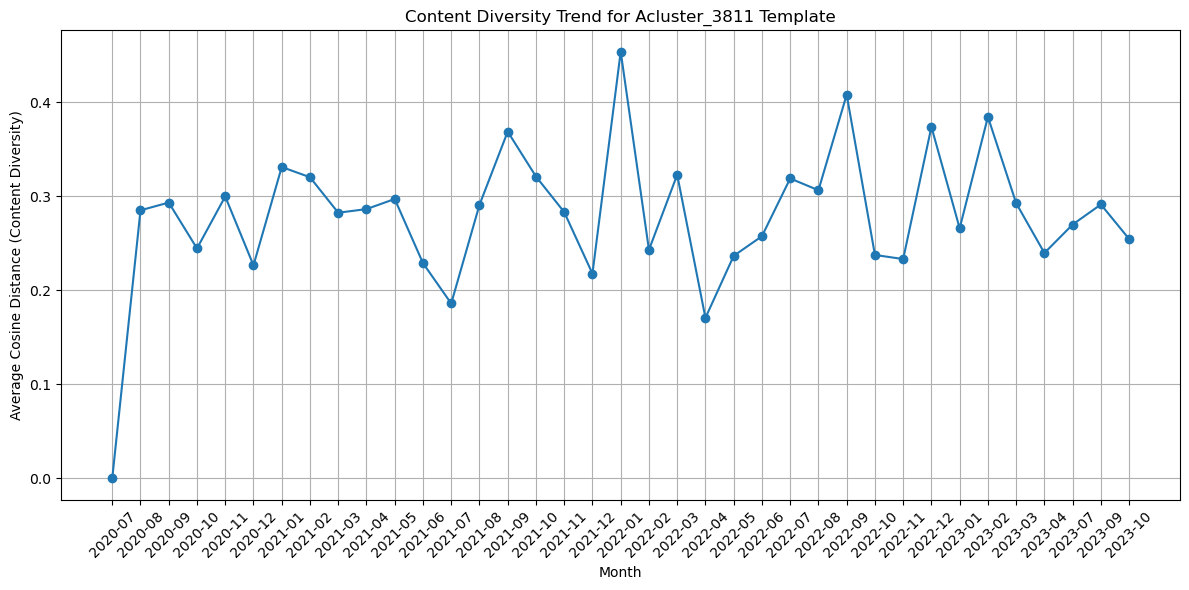

In [31]:
cluster = "Acluster_3811"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

In [32]:
template_df = meme_df[meme_df["cluster"]=="Acluster_3811"]
print(f"{cluster} template has {len(template_df)} instances")

embeddings = np.array(template_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

Acluster_3811 template has 334 instances
Average Pairwise Distance: 0.481133597535502


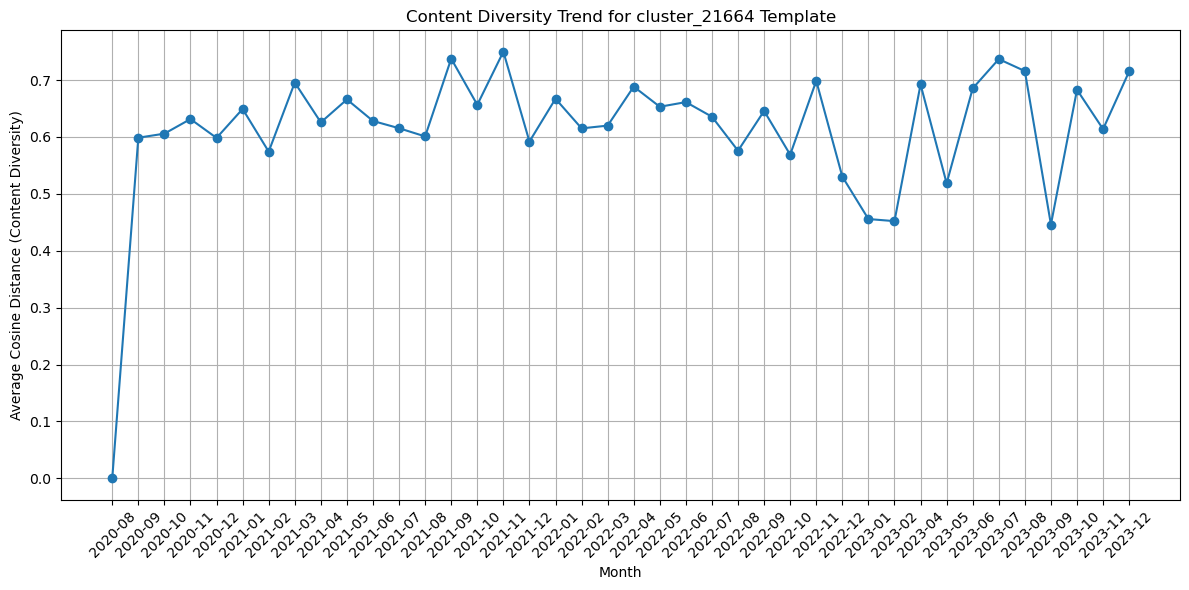

In [33]:
cluster = "cluster_21664"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
template_df = meme_df[meme_df["cluster"]=="cluster_21664"]
print(f"{cluster} template has {len(template_df)} instances")

embeddings = np.array(template_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

cluster_21664 template has 502 instances
Average Pairwise Distance: 0.8484694681974831


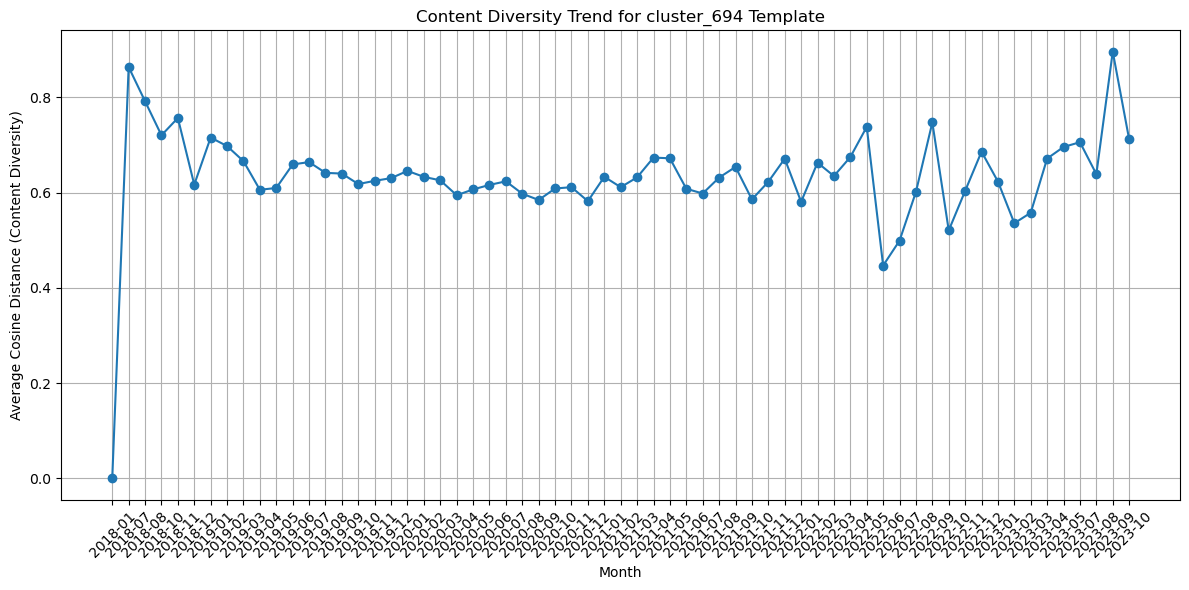

In [35]:
cluster = "cluster_694"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
template_df = meme_df[meme_df["cluster"]=="cluster_694"]
print(f"{cluster} template has {len(template_df)} instances")

embeddings = np.array(template_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

cluster_694 template has 1106 instances
Average Pairwise Distance: 0.8556015092824062


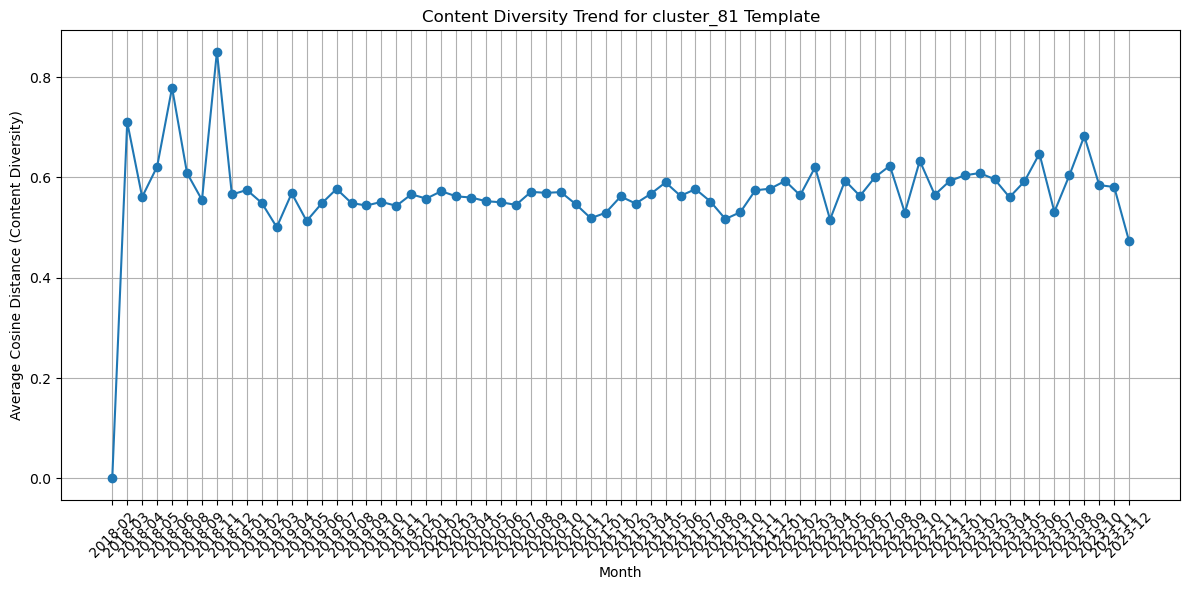

In [37]:
cluster = "cluster_81"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

In [38]:
template_df = meme_df[meme_df["cluster"]=="cluster_81"]
print(f"{cluster} template has {len(template_df)} instances")

embeddings = np.array(template_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

cluster_81 template has 1191 instances
Average Pairwise Distance: 0.8043791089656549


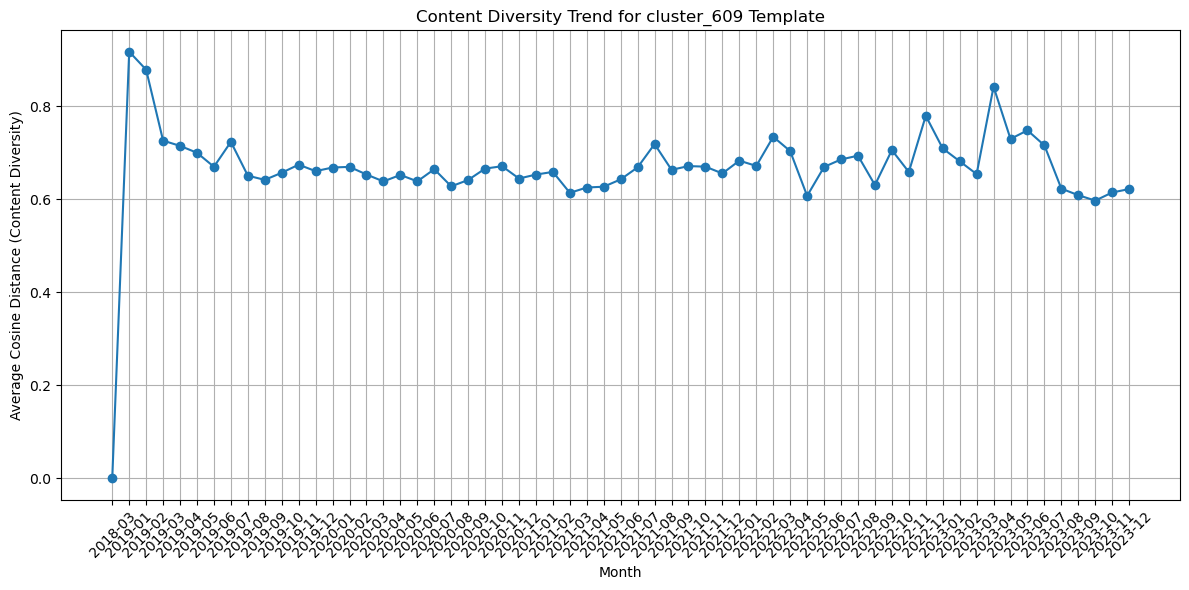

In [39]:
cluster = "cluster_609"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

In [40]:
template_df = meme_df[meme_df["cluster"]=="cluster_609"]
print(f"{cluster} template has {len(template_df)} instances")

embeddings = np.array(template_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

cluster_609 template has 894 instances
Average Pairwise Distance: 0.8784132089675275


In [41]:
template_df = meme_df[meme_df["cluster"]=="cluster_833"]
print(f"{cluster} template has {len(template_df)} instances")

embeddings = np.array(template_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

cluster_609 template has 984 instances
Average Pairwise Distance: 0.7894727573242591


In [42]:
template_df = meme_df[meme_df["cluster"]=="cluster_318"]
print(f"{cluster} template has {len(template_df)} instances")

embeddings = np.array(template_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

cluster_609 template has 898 instances
Average Pairwise Distance: 0.7391268759564442


In [43]:
template_df = meme_df[meme_df["cluster"]=="cluster_33515"]
print(f"{cluster} template has {len(template_df)} instances")

embeddings = np.array(template_df["embedding"].to_list())
pairwise_distances = pdist(embeddings, metric='cosine')
average_pairwise_distance = pairwise_distances.mean()
print(f"Average Pairwise Distance: {average_pairwise_distance}")

cluster_609 template has 546 instances
Average Pairwise Distance: 0.8815784996497776


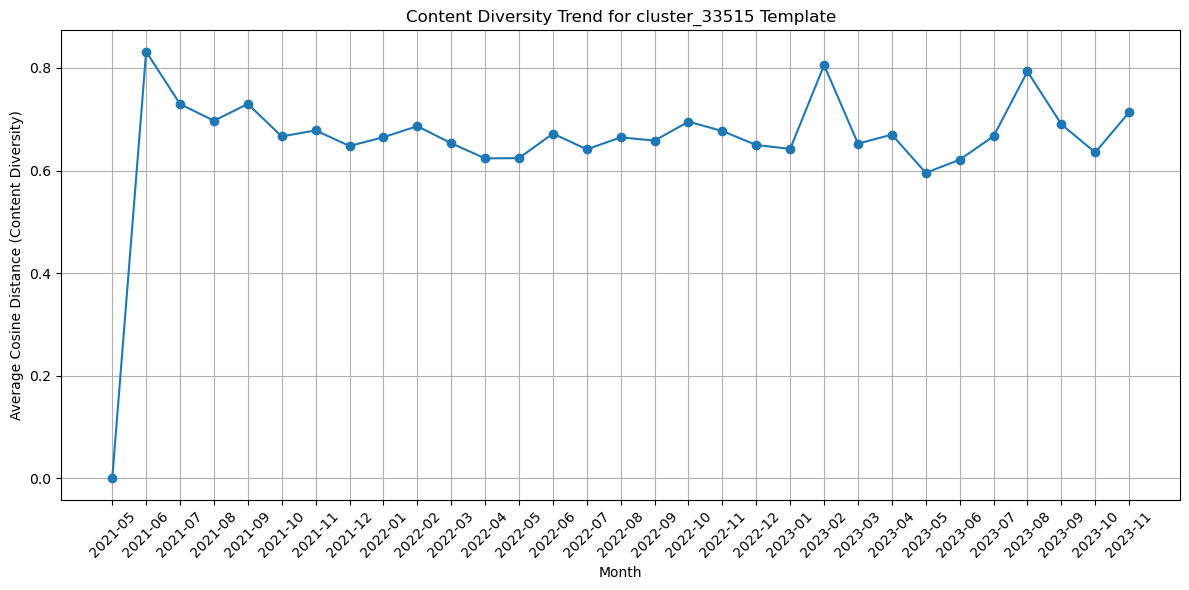

In [44]:
cluster = "cluster_33515"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()

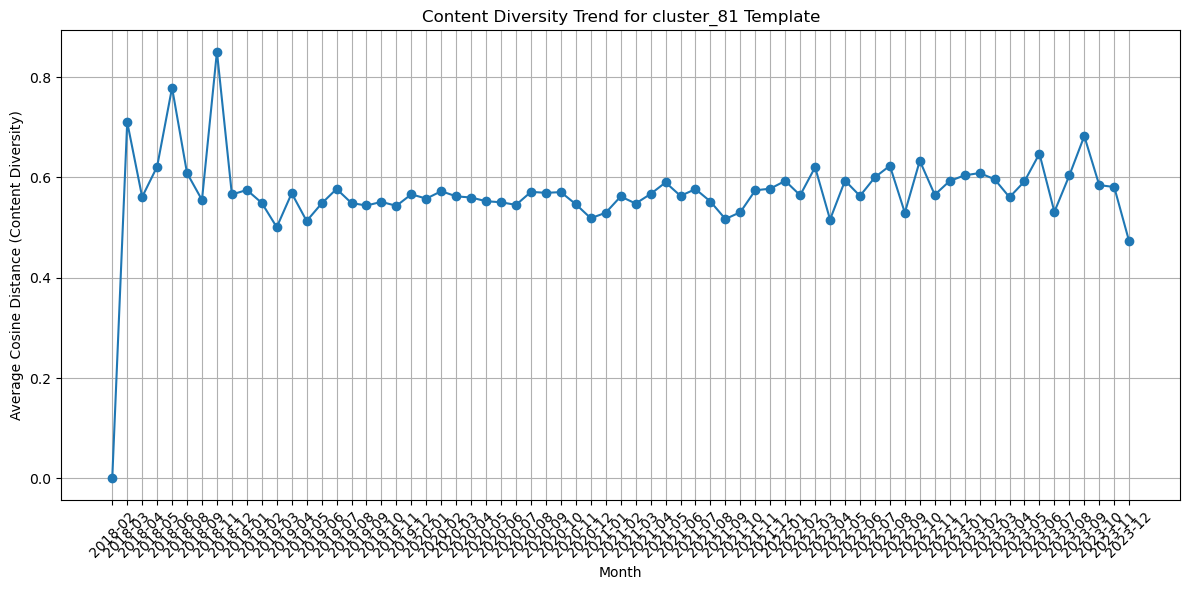

In [45]:
cluster = "cluster_81"
template_df = meme_df[meme_df["cluster"] == cluster]
template_df = template_df.sort_values("created_date")
template_df["Month"] = template_df["created_date"].dt.to_period("M")

monthly_diversity = []
months = []
template_embedding = None  # Initialize the template embedding

for month, group in template_df.groupby("Month"):
    # Update the template embedding (average of historical embeddings)
    historical_data = template_df[template_df["Month"] < month]  # Historical memes
    if not historical_data.empty:
        historical_embeddings = np.array(historical_data["embedding"].to_list())
        template_embedding = np.mean(historical_embeddings, axis=0)
    else:
        template_embedding = None  # No historical embedding for the first month
    
    # Compute diversity for the current month
    if template_embedding is not None:
        distances = []
        for embedding in group["embedding"]:
            distance = cosine(template_embedding, embedding)
            distances.append(distance)
        average_distance = np.mean(distances)
    else:
        average_distance = 0  # No diversity for the first month with no history
    
    monthly_diversity.append(average_distance)
    months.append(month)

# Convert results to a DataFrame for visualization
diversity_trend_df = pd.DataFrame({
    "Month": months,
    "Content Diversity": monthly_diversity
})

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(diversity_trend_df["Month"].astype(str), diversity_trend_df["Content Diversity"], marker='o')
plt.xticks(rotation=45)
plt.title(f"Content Diversity Trend for {cluster} Template")
plt.xlabel("Month")
plt.ylabel("Average Cosine Distance (Content Diversity)")
plt.grid()
plt.tight_layout()
plt.show()